# Vowel Formants Exploration

In [1]:
import pandas as pd
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
files = ['data/vowel_midpoints_dr' + str(ind) + '.txt' for ind in range(1,9)]
timit = pd.concat([pd.read_csv(file, sep='\t') for file in files]).reset_index(drop=True)
timit.head(20)

,speaker,gender,file,t,word,vowel,stress,duration,f1,f2,f3,f0
0,fcjf0,female,sa1,0.3225,SHE,IY,1,0.08,486.2,2467.9,3185.1,244.9
1,fcjf0,female,sa1,0.5025,HAD,AE,1,0.10,595.1,2067.0,2976.7,241.6
2,fcjf0,female,sa1,0.6825,YOUR,UH,1,0.04,468.7,1956.1,3061.4,201.9
3,fcjf0,female,sa1,0.8525,DARK,AA,1,0.10,740.4,1674.1,2767.3,221.5
4,fcjf0,female,sa1,1.1975,SUIT,UW,1,0.17,464.0,1698.0,2904.9,232.6
5,fcjf0,female,sa1,1.3275,IN,AH,0,0.03,501.4,1929.1,2874.8,269.0
6,fcjf0,female,sa1,1.5525,GREASY,IY,1,0.04,431.5,2186.3,2858.7,207.8
7,fcjf0,female,sa1,1.7325,GREASY,IY,0,0.06,431.1,1368.3,2896.4,223.5
8,fcjf0,female,sa1,1.9175,WASH,AA,1,0.11,687.4,1309.6,2681.4,191.7
9,fcjf0,female,sa1,2.1775,WATER,AO,1,0.09,568.0,1105.9,2852.3,182.3


## Vowel Spaces

In [3]:
vows = timit["vowel"]
IPAdict = {"AO" : "ɔ", "AA" : "ɑ", "IY" : "i", "UW" : "u", "EH" : "ɛ", "IH" : "ɪ", "UH":"ʊ", "AH": "ʌ", "AX" : "ə", "AE":"æ", "EY" :"eɪ", "AY": "aɪ", "OW":"oʊ", "AW":"aʊ", "OY" :"ɔɪ", "ER":"ɝ"}
newVows = []
for i in vows:
    newVows += [IPAdict[i]]
timit['IPA'] = newVows        

In [31]:
avgs = timit.groupby('IPA').mean()
avgs.head()

,t,stress,duration,f1,f2,f3,f0
IPA,,,,,,,
aɪ,1.635594,1.054163,0.134256,681.465885,1617.320331,2499.876960,135.767785
aʊ,1.448535,1.048387,0.156129,715.092608,1347.778226,2545.013978,144.840457
eɪ,1.555879,1.144261,0.113957,491.265252,2032.372756,2625.841760,140.674900
i,1.464642,0.495423,0.092407,427.340202,2043.482354,2617.781014,146.176357
oʊ,1.234788,1.009368,0.116923,553.662717,1155.284637,2557.553349,148.857471


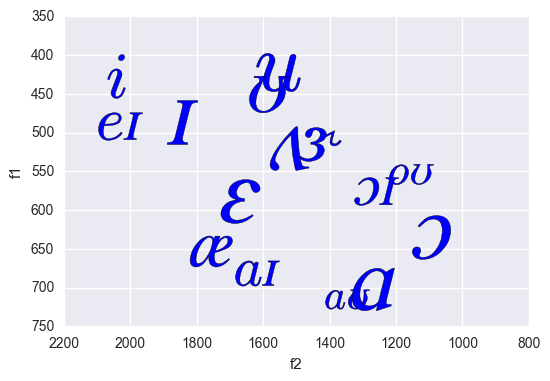

In [32]:
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=1000)
    
plt.ylabel('f1')
plt.xlabel('f2')

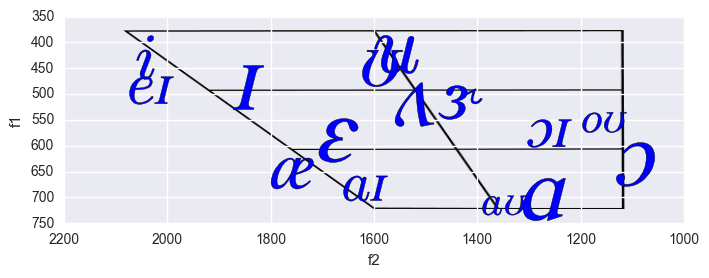

In [33]:
plt.figure(figsize=(8, 10))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=1000)
    
plt.ylabel('f1')
plt.xlabel('f2')

im = plt.imread('images/blankvowel.png')
ax = plt.imshow(im, extent=(plt.xlim()[0], plt.xlim()[1], plt.ylim()[0], plt.ylim()[1]))

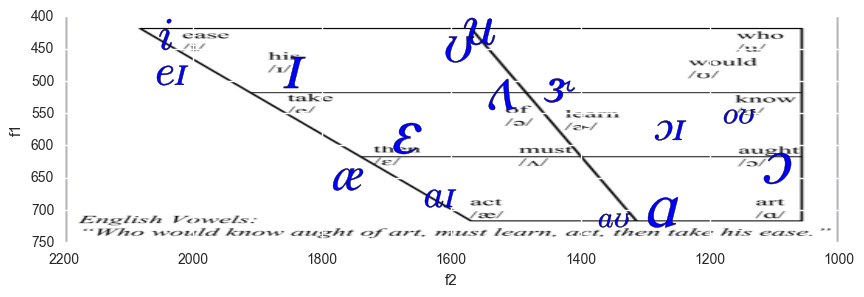

In [34]:
plt.figure(figsize=(10,4))

plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

for i in range(len(avgs)):
    plt.scatter(avgs.f2[i], avgs.f1[i], marker=r"$ {} $".format(avgs.index[i]), s=500)
    
plt.ylabel('f1')
plt.xlabel('f2')

im = plt.imread('images/notblank.png')
ax = plt.imshow(im, extent=(2200, 1000, 750, 400))